In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import detrend

In [2]:
! cp /content/drive/MyDrive/Colab\ Notebooks/transient_detection/gps_signal.py .
from gps_signal import transient, colored_noise, seasonal

In [3]:
sns.set_style("white")
sns.color_palette("Set2")
plt.rcParams['font.size'] = '12'

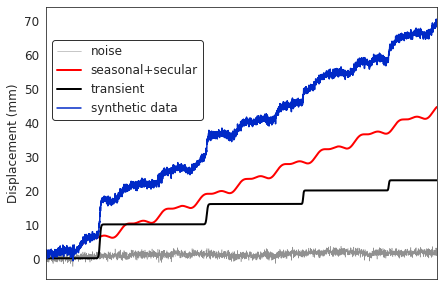

In [22]:
np.random.seed(48)

n = 3650
t = np.arange(0,n)

# noise + seasonal
d_noise = colored_noise(n,wn=[0.6,0.6],fn=[1.0,1.0],rw=[0.5,0.5])

# transient
d_transient_1 = transient(n,size=10,duration=50,center=500)
d_transient_2 = transient(n,size=6,duration=50,center=1500)
d_transient_3 = transient(n,size=4,duration=30,center=2400)
d_transient_4 = transient(n,size=3,duration=30,center=3200)
d_transient = d_transient_1 + d_transient_2 + d_transient_3+d_transient_4

d_secular = 0.012*(t - t[0])

d_seasonal = seasonal(n, an=[1.0,1.0], sa=[0.5,0.5])
# total



# plot
plt.figure(figsize=(7,5))
plt.plot(t, d_noise, linewidth=0.5, color=[0.5686,0.5686,0.5686])
plt.plot(t, d_seasonal + d_secular, 'r-', linewidth=2)
plt.plot(t, d_transient, 'k', linewidth=2)
plt.plot(t, d_noise + d_transient + d_secular + d_seasonal, '-', color=[0,0.1608,0.7804])
# plt.plot(t, d_noise, color='gray', linewidth=2)
# plt.plot(t, d_transient, color='red', linewidth=3)
# plt.plot(t, d + 9, '.', color='blue', linewidth=3)

#plt.ylim([-20,20])
plt.xlim([0, n])
leg = plt.legend(['noise', 'seasonal+secular', 'transient', 'synthetic data'], loc='upper left', bbox_to_anchor=(0, 0.90))
frame = leg.get_frame()
frame.set_edgecolor('k')
# bbox_to_anchor=(1.015, -0.2)
plt.ylabel('Displacement (mm)')
plt.xticks([])
#plt.show()
plt.savefig('data.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

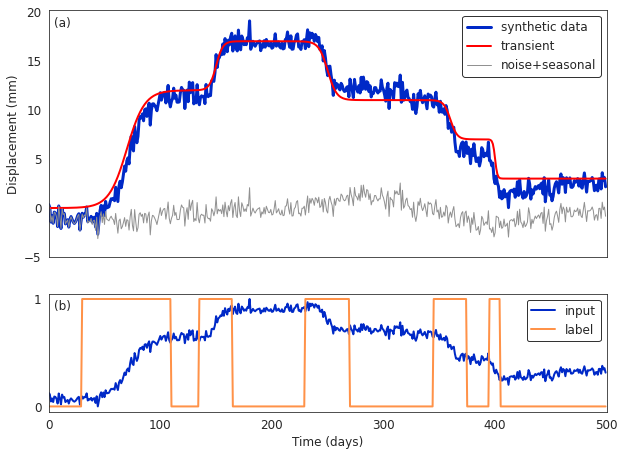

In [101]:
np.random.seed(37)

n = 500
t = np.arange(0,n)

# noise + seasonal
d_noise = colored_noise(n,wn=[0.6,0.6],fn=[1.0,1.0],rw=[0.5,0.5])

# transient
d_transient_1 = transient(n,size=12,duration=80,center=70)
d_transient_2 = transient(n,size=5,duration=30,center=150)
d_transient_3 = transient(n,size=-6,duration=40,center=250)
d_transient_4 = transient(n,size=-4,duration=30,center=360)
d_transient_5 = transient(n,size=-4,duration=10,center=400)
d_transient = d_transient_1 + d_transient_2 + d_transient_3 + d_transient_4 + d_transient_5

d_seasonal = seasonal(n, an=[1.0,1.0], sa=[0.5,0.5])
# total

# plot
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t, d_noise + d_transient + d_seasonal, '-', linewidth=3, color=[0,0.1608,0.7804])
plt.plot(t, d_transient, 'r', linewidth=2)
plt.plot(t, d_noise + d_seasonal, linewidth=1, color=[0.5686,0.5686,0.5686])

# plt.plot(t, d_noise, color='gray', linewidth=2)
# plt.plot(t, d_transient, color='red', linewidth=3)
# plt.plot(t, d + 9, '.', color='blue', linewidth=3)

leg = plt.legend(['synthetic data', 'transient', 'noise+seasonal', ], loc='upper right')
frame = leg.get_frame()
frame.set_edgecolor('k')
# bbox_to_anchor=(1.015, -0.2)
plt.ylabel('Displacement (mm)')
plt.xticks([])
plt.yticks(np.arange(-5,21,5))
plt.xlim([0, n])
plt.text(5, 18.5, '(a)')

d = detrend(d_noise + d_transient + d_seasonal)
min_val = np.min(d)
max_val = np.max(d)

d = (d - min_val)/ (max_val - min_val)

l = np.zeros(n)
l[30:110] = 1
l[135:165] = 1
l[230:270] = 1
l[345:375] = 1
l[395:405] = 1


plt.subplot(4,1,3)
plt.plot(d, color=[0,0.1608,0.7804], linewidth=2)
plt.plot(l, color=[1.0000, 0.5725, 0.2824], linewidth=2)
plt.yticks([0,1])
plt.xlabel('Time (days)')
leg = plt.legend(['input', 'label'], loc='upper right')
frame = leg.get_frame()
frame.set_edgecolor('k')
plt.xlim([0, n])
plt.text(5, 0.9, '(b)')

#plt.show()
plt.savefig('synthetic_example.pdf', format='pdf',bbox_inches='tight', pad_inches=0.05)

In [ ]:
def scale_data(raw_data):

  tmp_data = detrend(raw_data)
  min_val = np.min(tmp_data)
  max_val = np.max(tmp_data)

  data = (tmp_data - min_val) / (max_val - min_val)
  
  return data

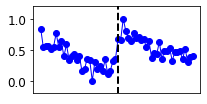

In [ ]:
d_noise = nuisance_signal(60,1/365.25,wn=[0.9,0.9],fn=[1.2,1.2],rw=[0.1,0.1],an=[0,0],sa=[0,0],ol_max=0,ol_prob=0.01)
d_transient = transient_signal(60,size=8,duration=0.2,center=0.5)

d = d_noise + d_transient
d = scale_data(d)

plt.figure(figsize=(3,1.6))

plt.plot(d, 'bo-', linewidth=1, markersize=6)
# plot a vertical line and intersection with the velocity
plt.plot([30,30], [-10, 10], 'k--',linewidth=2)
plt.ylim(-0.2,1.2)
plt.xticks([])
plt.show()

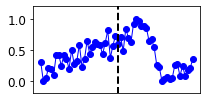

In [ ]:
d_noise = nuisance_signal(60,1/365.25,wn=[0.9,0.9],fn=[1.2,1.2],rw=[0.1,0.1],an=[0,0],sa=[0,0],ol_max=0,ol_prob=0.01)
d_transient = transient_signal(60,size=-8,duration=0.2,center=0.75)

d = d_noise + d_transient
d = scale_data(d)

plt.figure(figsize=(3,1.6))

plt.plot(d, 'bo-', linewidth=1, markersize=6)
# plot a vertical line and intersection with the velocity
plt.plot([30,30], [-10, 10], 'k--',linewidth=2)
plt.ylim(-0.2,1.2)
plt.xticks([])
plt.show()

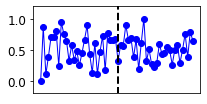

In [ ]:
d_noise = nuisance_signal(60,1/365.25,wn=[0.9,0.9],fn=[1.2,1.2],rw=[0.1,0.1],an=[0,0],sa=[0,0],ol_max=0,ol_prob=0.01)

d = d_noise
d = scale_data(d)

plt.figure(figsize=(3,1.6))

plt.plot(d, 'bo-', linewidth=1, markersize=6)
# plot a vertical line and intersection with the velocity
plt.plot([30,30], [-10, 10], 'k--',linewidth=2)
plt.ylim(-0.2,1.2)
plt.xticks([])
plt.show()